In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Sales Dataset

In [3]:
sales_df = pd.read_csv('Sales.csv')
sales_df.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2/5/2010,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,3/5/2010,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,4/2/2010,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,5/7/2010,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,6/4/2010,17558.09,False,27.050000,0.714586,7.808


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB


## Summary Statistics

##### Q1

In [63]:
sales_numerical_mean = sales_df.select_dtypes(include=['int64', 'float64']).mean()
sales_numerical_median = sales_df.select_dtypes(include=['int64', 'float64']).median()
print(sales_numerical_mean)
print("\n", sales_numerical_median)

store                      15.441897
department                 45.218118
weekly_sales            23843.950149
temperature_c              15.731978
fuel_price_usd_per_l        0.749746
unemployment                8.082009
dtype: float64

 store                      13.000000
department                 40.000000
weekly_sales            12049.065000
temperature_c              16.966667
fuel_price_usd_per_l        0.743381
unemployment                8.099000
dtype: float64


##### Q2

In [64]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
min_date = sales_df['date'].min()
max_date = sales_df['date'].max()
print(max_date)
print(min_date)

2012-10-26 00:00:00
2010-02-05 00:00:00


##### Q3

In [65]:
store_type_sum = sales_df.groupby('type')['weekly_sales'].sum()
weeklysalesA = store_type_sum['A']
weeklysalesA

233716315.01

##### Q4

In [66]:
sales_df['weekly_sales'].agg(['var', 'std'])

var    9.132718e+08
std    3.022039e+04
Name: weekly_sales, dtype: float64

##### Q5

In [68]:
iqr_values = sales_df[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg(
    lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)
)
iqr_values

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64

##### Q6

In [67]:
stores_sum = sales_df.groupby('store')['weekly_sales'].sum()
stores_sum

store
1     18828144.55
2     23786139.34
4     23540414.45
6     19275700.71
10    23178403.89
13    23431368.47
14    26889842.67
19    18057339.37
20    25828317.41
27    21786727.24
31    16179249.68
39    16113071.12
Name: weekly_sales, dtype: float64

## Job Seekers Dataset

In [38]:
jobseek_df = pd.read_csv('Job_Seekers.csv')
jobseek_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0


In [39]:
jobseek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(2), int64(3), object(9)
mem

## Univariate Analysis

##### Q1

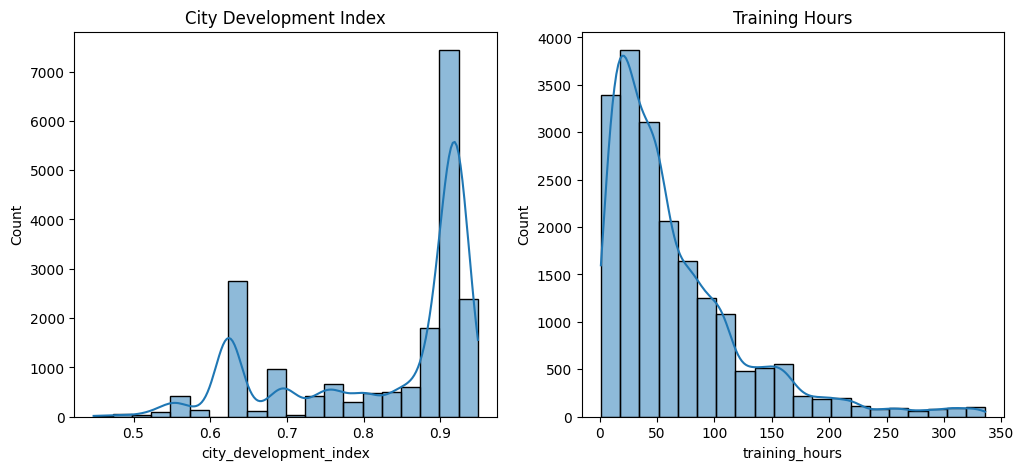

In [75]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(jobseek_df['city_development_index'], bins=20, kde=True)
plt.title('City Development Index')

plt.subplot(1, 2, 2)
sns.histplot(jobseek_df['training_hours'], bins=20, kde=True)
plt.title('Training Hours')

plt.show()

##### Q2

C:\Users\Safwan\AppData\Local\Temp\ipykernel_5236\1817379040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=jobseek_df['gender'], palette='magma')
C:\Users\Safwan\AppData\Local\Temp\ipykernel_5236\1817379040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=jobseek_df['education_level'], palette='rocket')


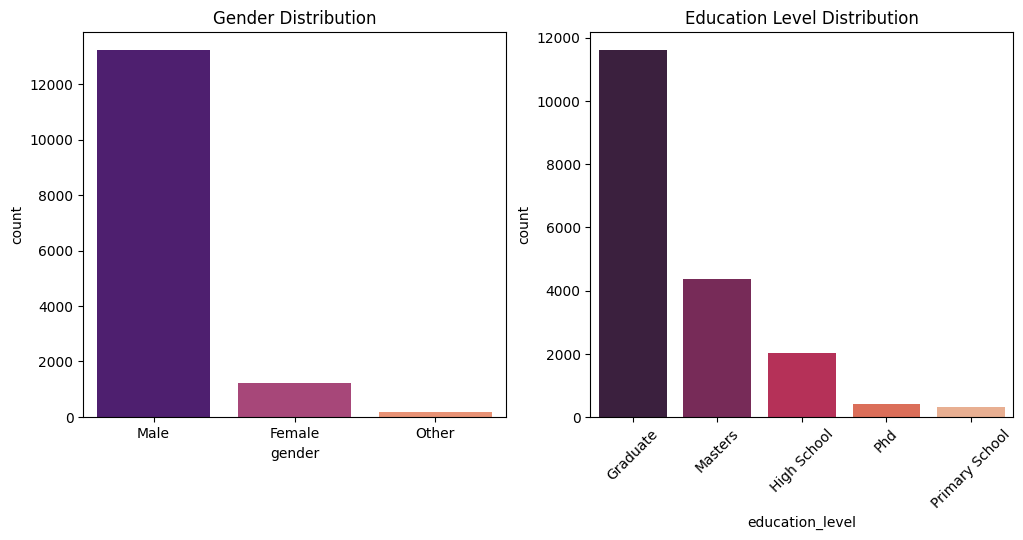

In [78]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=jobseek_df['gender'], palette='magma')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x=jobseek_df['education_level'], palette='rocket')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

plt.show()

##### Q3

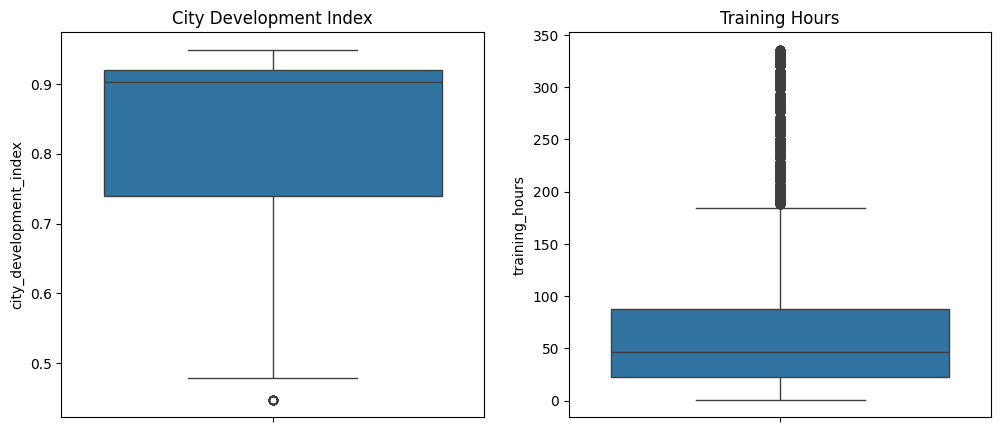

In [79]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=jobseek_df['city_development_index'])
plt.title('City Development Index')

plt.subplot(1, 2, 2)
sns.boxplot(y=jobseek_df['training_hours'])
plt.title('Training Hours')

plt.show()

##### Q4

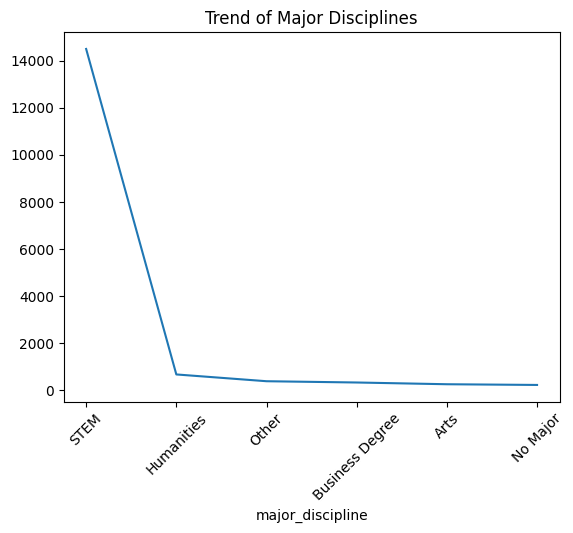

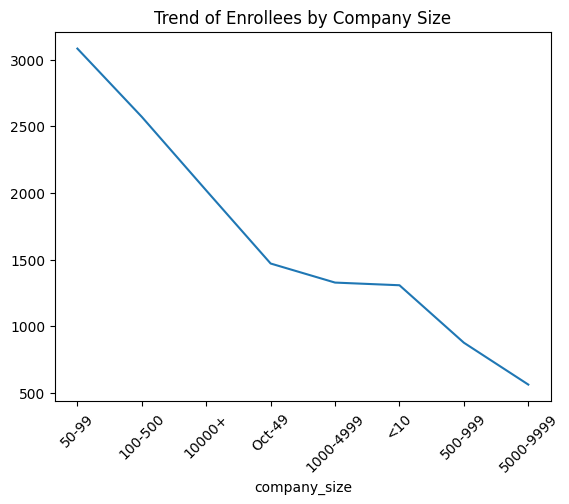

In [81]:
sns.lineplot(x=jobseek_df['major_discipline'].value_counts().index, 
             y=jobseek_df['major_discipline'].value_counts().values)
plt.title('Trend of Major Disciplines')
plt.xticks(rotation=45)
plt.show()

sns.lineplot(x=jobseek_df['company_size'].value_counts().index, 
             y=jobseek_df['company_size'].value_counts().values)
plt.title('Trend of Enrollees by Company Size')
plt.xticks(rotation=45)

plt.show()

##### Q5

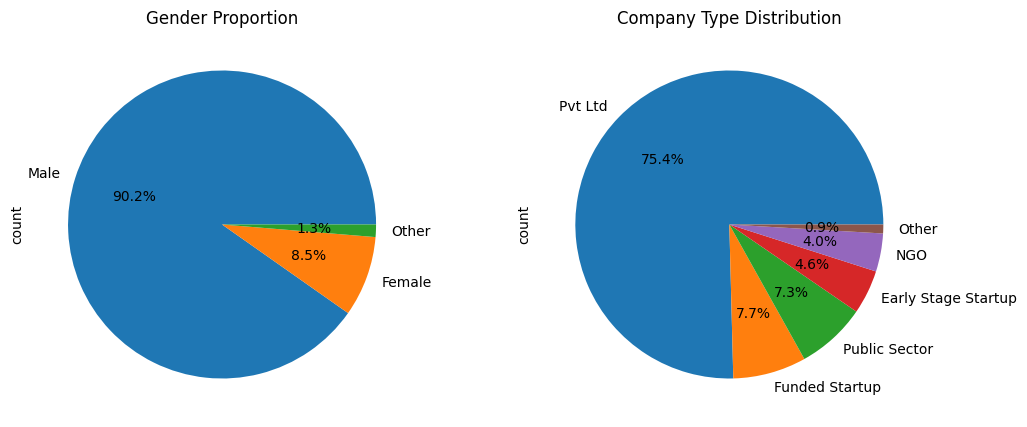

In [87]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
jobseek_df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Proportion')

plt.subplot(1, 2, 2)
jobseek_df['company_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Company Type Distribution')

plt.show()

## Bivariate Analysis

##### Q1

##### Q2

##### Q3

## Correlation Analysis

##### Q1

##### Q2